In [203]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import sys
import time
import numpy as np
import math
import pandas as pd
from datetime import datetime
from torch.autograd import Variable

In [125]:
try:
    df = pd.read_csv('power_usage_data.csv')  
    print("Load file success")
except:
    print("Load file faild!")
    sys.exit(0)

arr = np.array(df.iloc[1:,0])
#print(arr)  
#print(df.columns)  

Load file success


In [168]:
num = np.array(df.iloc[1:,0])                                  #date
net_peak = np.array(df.iloc[1:,1]).astype(np.float)            #net peak
peak = np.array(df.iloc[1:,2]).astype(np.float)                #peak
operating_reserve = np.array(df.iloc[1:,3]).astype(np.float)   #Operating Reserve
P_operating_reserve = np.array(df.iloc[1:,4]).astype(np.float) #Percent Operating Reserve
industry_useage = np.array(df.iloc[1:,5]).astype(np.float)     #industry useage
house_useage = np.array(df.iloc[1:,6]).astype(np.float)        #industry useage


num_t = [datetime.strptime(format(nums), '%Y%m%d').date() for nums in num]


Text(0.5,1,'house useage (MW)')

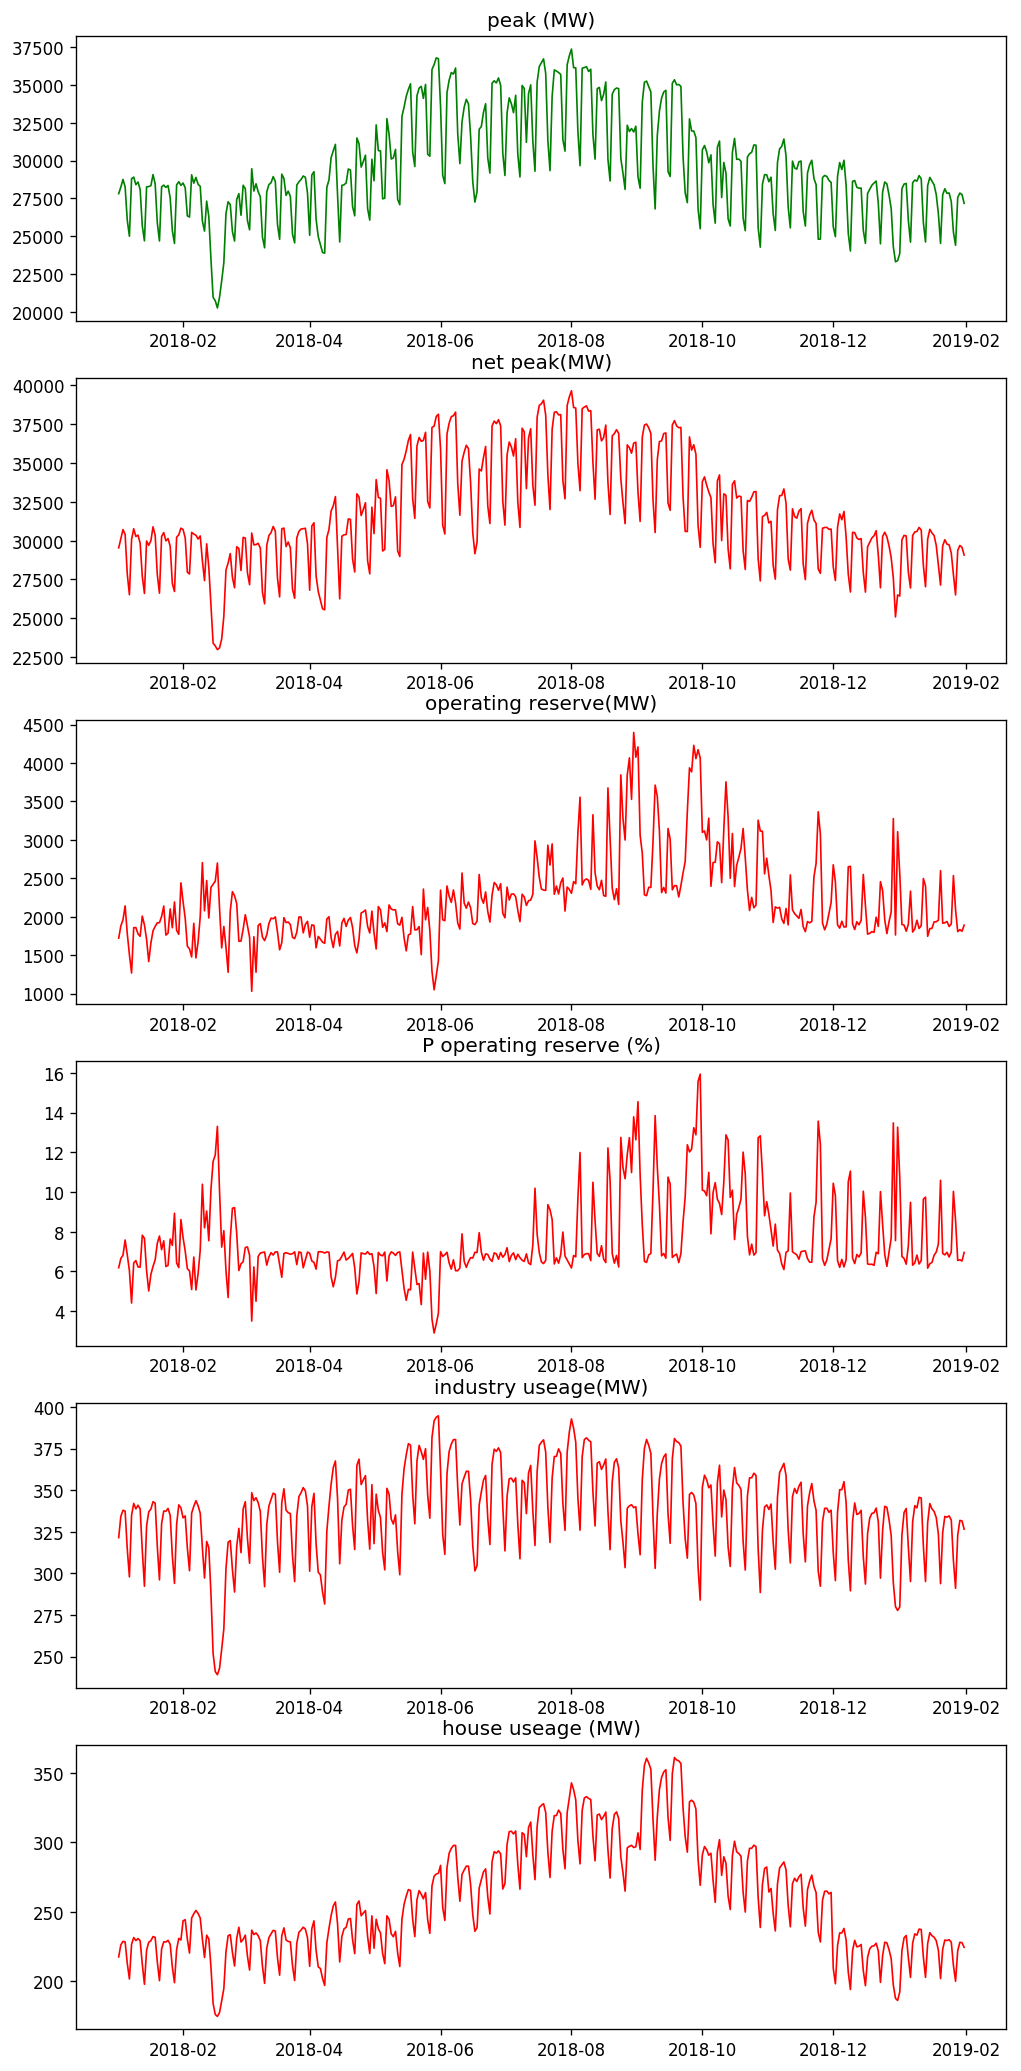

In [127]:
fig = plt.figure(figsize=(10,22),dpi=120)
ax1 = fig.add_subplot(6,1,1)
ax2 = fig.add_subplot(6,1,2)
ax3 = fig.add_subplot(6,1,3)
ax4 = fig.add_subplot(6,1,4)
ax5 = fig.add_subplot(6,1,5)
ax6 = fig.add_subplot(6,1,6)

ax1.plot(num_t,peak, lw=1, c='g')
ax1.set_title('peak (MW)')
#ax1.set_xlabel('date')
#ax1.set_ylabel('power(MW)')


ax2.plot(num_t,net_peak, lw=1, c='r')
ax2.set_title('net peak(MW)')
#ax2.set_xlabel('date')
#ax2.set_ylabel('percentage(%)')

ax3.plot(num_t,operating_reserve, lw=1, c='r')
ax3.set_title('operating reserve(MW)')
#ax2.set_xlabel('date')
#ax3.set_ylabel('percentage(%)')


ax4.plot(num_t,P_operating_reserve, lw=1, c='r')
ax4.set_title('P operating reserve (%)')
#ax2.set_xlabel('date')
#ax4.set_ylabel('percentage(%)')

ax5.plot(num_t,industry_useage, lw=1, c='r')
ax5.set_title('industry useage(MW)')
#ax2.set_xlabel('date')
#ax4.set_ylabel('percentage(%)')

ax6.plot(num_t,house_useage, lw=1, c='r')
ax6.set_title('house useage (MW)')
#ax2.set_xlabel('date')
#ax4.set_ylabel('percentage(%)')

#plt.gcf().autofmt_xdate()


In [169]:
number = np.arange(0,len(num)) 


number = torch.unsqueeze(torch.from_numpy(number), dim=1).float()
net_peak = torch.unsqueeze(torch.from_numpy(net_peak), dim=1).float()
peak = torch.unsqueeze(torch.from_numpy(peak), dim=1).float()
operating_reserve = torch.unsqueeze(torch.from_numpy(operating_reserve), dim=1).float()
P_operating_reserve = torch.unsqueeze(torch.from_numpy(P_operating_reserve), dim=1).float()
industry_useage = torch.unsqueeze(torch.from_numpy(industry_useage), dim=1).float()
house_useage = torch.unsqueeze(torch.from_numpy(house_useage), dim=1).float()

x = [net_peak,peak,operating_reserve,P_operating_reserve,industry_useage,house_useage]
x = torch.cat(x,1)
y = peak

In [195]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(6, 12)   # hidden layer
        self.fcbn1 = torch.nn.BatchNorm1d(64)
        self.hidden2 = torch.nn.Linear(12, 8)   #  layer
        self.fcbn2 = torch.nn.BatchNorm1d(48)
        self.hidden3 = torch.nn.Linear(8, 4)   #  layer
        self.fcbn3 = torch.nn.BatchNorm1d(24)
        self.predict = torch.nn.Linear(12, 1)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        #x = self.fcbn1(x)
        #x = self.hidden2(x)
        #x = self.fcbn2(x)
        #x = self.hidden3(x)
        #x = self.fcbn3(x)
        x = self.predict(x)             # linear output
        return x

In [196]:
net = Net()     # define the network
print(net)  # net architecture

Net(
  (hidden): Linear(in_features=6, out_features=12, bias=True)
  (fcbn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hidden2): Linear(in_features=12, out_features=8, bias=True)
  (fcbn2): BatchNorm1d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hidden3): Linear(in_features=8, out_features=4, bias=True)
  (fcbn3): BatchNorm1d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (predict): Linear(in_features=12, out_features=1, bias=True)
)


In [197]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

In [198]:
EPOCH = 10
BATCH_SIZE = 200

optimizer = torch.optim.SGD(net.parameters(), lr=0.1)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

In [199]:
def train(epoch):
    for step in range(2000):
        prediction = net(x)     # input x and predict based on x

        loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

        optimizer.zero_grad()   # clear gradients for next train
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        # apply gradients
        if step % 500 == 0:
                print('Train Epoch: {} \tLoss: {:.6f}'.format(epoch, loss.data.numpy()))
        #print("Finish")

In [200]:
for epoch in range(1,EPOCH):
    train(epoch)

Train Epoch: 1 	Loss: 794456320.000000
Train Epoch: 1 	Loss: 12019860.000000
Train Epoch: 1 	Loss: 12019860.000000
Train Epoch: 1 	Loss: 12019860.000000
Train Epoch: 2 	Loss: 12019860.000000
Train Epoch: 2 	Loss: 12019860.000000
Train Epoch: 2 	Loss: 12019860.000000
Train Epoch: 2 	Loss: 12019860.000000
Train Epoch: 3 	Loss: 12019860.000000
Train Epoch: 3 	Loss: 12019860.000000
Train Epoch: 3 	Loss: 12019860.000000
Train Epoch: 3 	Loss: 12019860.000000
Train Epoch: 4 	Loss: 12019860.000000
Train Epoch: 4 	Loss: 12019860.000000
Train Epoch: 4 	Loss: 12019860.000000
Train Epoch: 4 	Loss: 12019860.000000
Train Epoch: 5 	Loss: 12019860.000000
Train Epoch: 5 	Loss: 12019860.000000
Train Epoch: 5 	Loss: 12019860.000000
Train Epoch: 5 	Loss: 12019860.000000
Train Epoch: 6 	Loss: 12019860.000000
Train Epoch: 6 	Loss: 12019860.000000
Train Epoch: 6 	Loss: 12019860.000000
Train Epoch: 6 	Loss: 12019860.000000
Train Epoch: 7 	Loss: 12019860.000000
Train Epoch: 7 	Loss: 12019860.000000
Train Epoch

In [204]:
labels = Variable(365)
print(lables)

#print(net(396))

TypeError: Variable data has to be a tensor, but got int